<a href="https://www.kaggle.com/code/mikedelong/let-s-look-at-outliers?scriptVersionId=137762251" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
videos_df = pd.read_csv(filepath_or_buffer='../input/top-youtube-news-media-statistics/_Top50_viewed_video_from_each_channels.csv',
                        index_col=[0], parse_dates=['publishedAt'], ).drop(columns=['Video Id'])
videos_df.head()

,channelTitle,title,publishedAt,categoryId,description,viewCount,likeCount,commentCount,duration
1400,USA TODAY,Heroic mom saves terrified five-year-old from ...,2022-12-05 17:28:31+00:00,25,A mother came to her five-year-old daughter's ...,347180823.0,10370485.0,269937.0,PT41S
1900,On Demand News,Fans Catch CAT Plummeting from Stadium,2021-09-13 15:02:56+00:00,25,'Fans Catch CAT Plummeting from Stadium'\n\nFa...,121244026.0,6269691.0,95053.0,PT44S
1401,USA TODAY,Brave woman fights off male attacker while alo...,2023-02-17 13:28:54+00:00,25,A 24-year-old woman successfully fought off a ...,112886052.0,4248640.0,92533.0,PT37S
1402,USA TODAY,"Hurricane Fiona devastates Puerto Rico, intens...",2022-09-22 17:29:38+00:00,25,Hurricane Fiona flooded Puerto Rico with 6 to ...,97966113.0,1504843.0,7100.0,PT42S
650,CBS News,Defendant collapses in court after guilty verdict,2017-11-14 17:36:13+00:00,25,Diana Lovejoy collapsed in a California courtr...,75970739.0,371733.0,79515.0,PT2M31S


<Axes: ylabel='categoryId'>

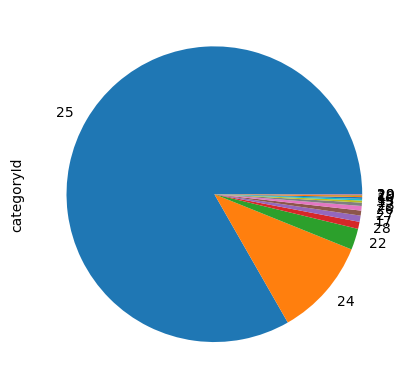

In [2]:
videos_df['categoryId'].value_counts().plot(kind='pie')

In [3]:
df = pd.read_csv('../input/top-youtube-news-media-statistics/Mainstream Media Statistics.csv', index_col=[0],
                parse_dates=['created date']).drop(columns=['id', 'playlistId'])
df.head()

,channelName,subscribers,total views,total videos,created date,description
0,Fox News,10500000,14839464315,93767,2006-09-19 01:48:52+00:00,FOX News Channel (FNC) is a 24-hour all-encomp...
1,Al Jazeera English,10500000,3343817389,105487,2006-11-23 14:12:43+00:00,"#AlJazeeraEnglish, we focus on people and even..."
2,Vox,11400000,3260217205,1593,2014-03-04 20:30:22+00:00,Vox helps you understand our world.\n\nVox vid...
3,Good Morning Britain,1200000,1048952422,11212,2014-08-18 09:23:49+00:00,The Good Morning Britain YouTube channel deliv...
4,E! News,1220000,515416062,12501,2005-10-25 11:21:48+00:00,E! News is your go-to source for breaking cele...


<Axes: >

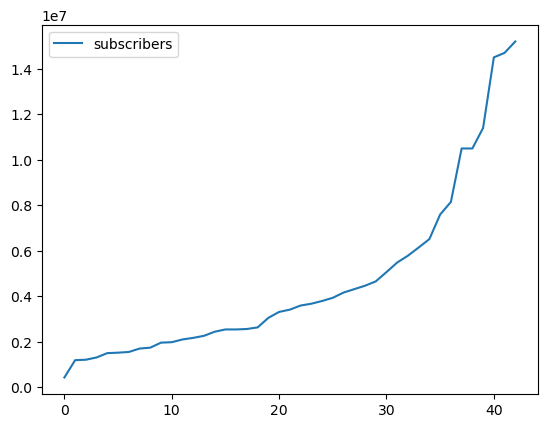

In [4]:
df.sort_values(ascending=True, by='subscribers').reset_index().plot(kind='line', y='subscribers')

<Axes: >

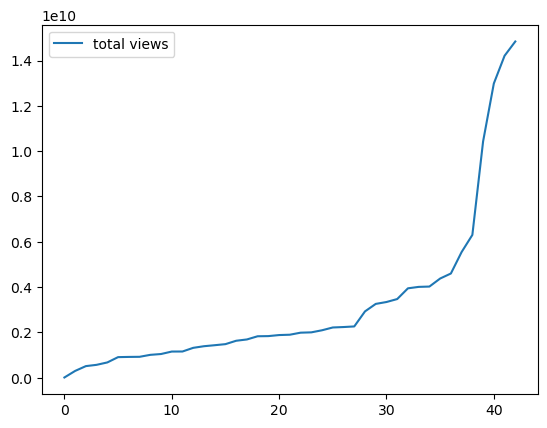

In [5]:
df.sort_values(ascending=True, by='total views').reset_index().plot(kind='line', y='total views')

<Axes: >

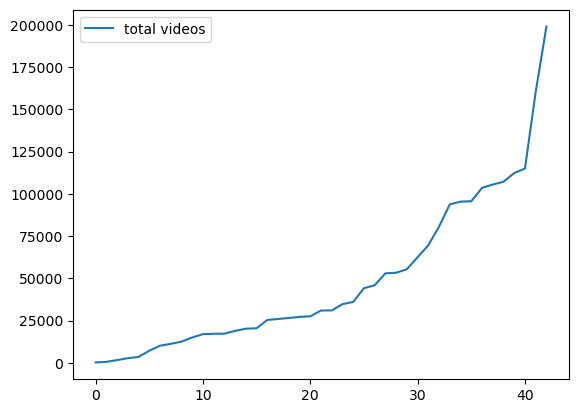

In [6]:
df.sort_values(ascending=True, by='total videos').reset_index().plot(kind='line', y='total videos')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


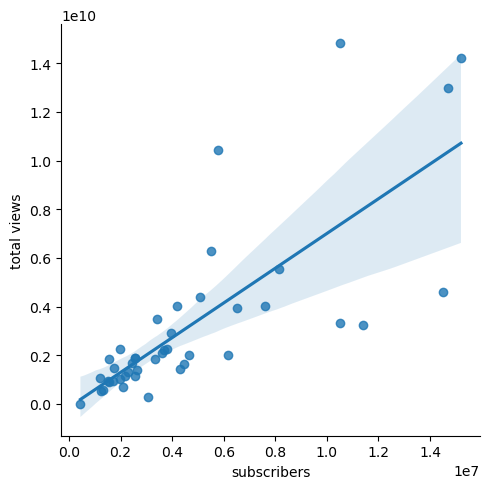

In [7]:
from seaborn import lmplot
lmplot(data=df, x='subscribers', y='total views')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


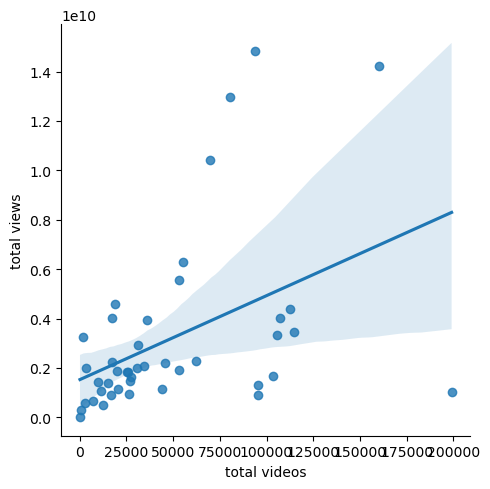

In [8]:
lmplot(data=df, x='total videos', y='total views')

<Axes: xlabel='viewCount', ylabel='likeCount'>

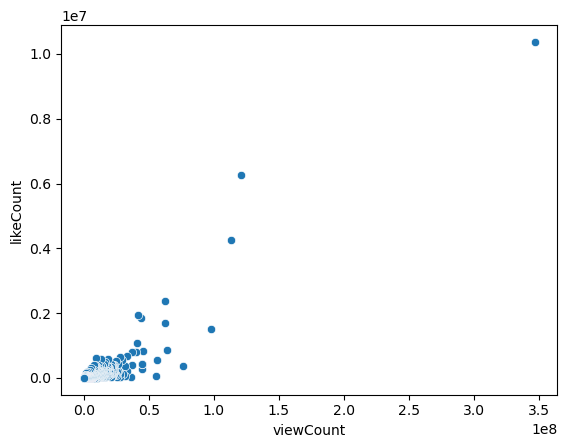

In [9]:
from seaborn import scatterplot
scatterplot(data=videos_df, x='viewCount', y='likeCount')

In [10]:
# what's that outlier?
videos_df.sort_values(by='likeCount', ascending=False).head(n=2)

,channelTitle,title,publishedAt,categoryId,description,viewCount,likeCount,commentCount,duration
1400,USA TODAY,Heroic mom saves terrified five-year-old from ...,2022-12-05 17:28:31+00:00,25,A mother came to her five-year-old daughter's ...,347180823.0,10370485.0,269937.0,PT41S
1900,On Demand News,Fans Catch CAT Plummeting from Stadium,2021-09-13 15:02:56+00:00,25,'Fans Catch CAT Plummeting from Stadium'\n\nFa...,121244026.0,6269691.0,95053.0,PT44S


<Axes: xlabel='viewCount', ylabel='commentCount'>

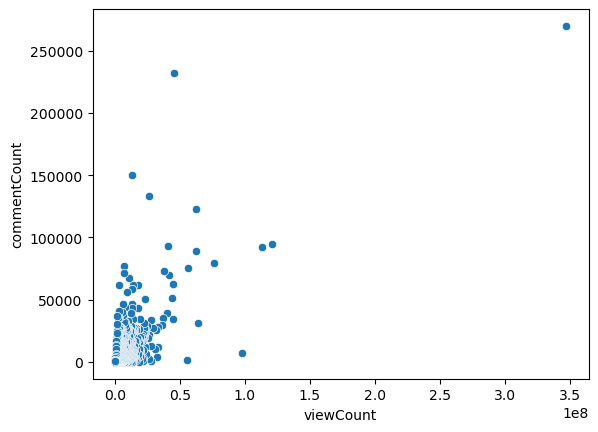

In [11]:
scatterplot(data=videos_df, x='viewCount', y='commentCount')

In [12]:
# what are those comment outliers?
videos_df.sort_values(by='commentCount', ascending=False).head(n=2)

,channelTitle,title,publishedAt,categoryId,description,viewCount,likeCount,commentCount,duration
1400,USA TODAY,Heroic mom saves terrified five-year-old from ...,2022-12-05 17:28:31+00:00,25,A mother came to her five-year-old daughter's ...,347180823.0,10370485.0,269937.0,PT41S
1451,Channel 4 News,"Jordan Peterson debate on the gender pay gap, ...",2018-01-16 17:13:07+00:00,25,"Channel 4 News’ full, fiery interview with cli...",45279588.0,834498.0,232517.0,PT29M56S


<Axes: >

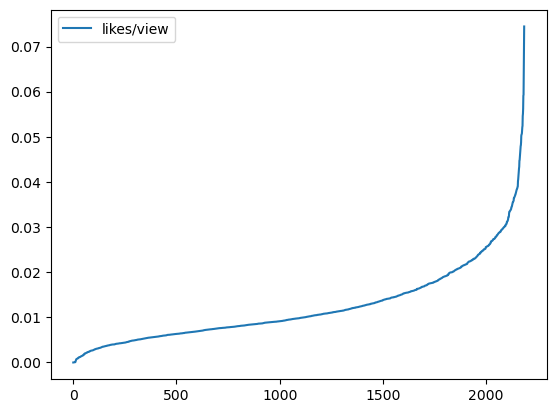

In [13]:
videos_df['likes/view'] = videos_df['likeCount'] / videos_df['viewCount']
videos_df.sort_values(by='likes/view').reset_index().plot(kind='line', y='likes/view')

In [14]:
# what are those like/view outliers?
videos_df.sort_values(ascending=False, by='likes/view').head(n=2)

,channelTitle,title,publishedAt,categoryId,description,viewCount,likeCount,commentCount,duration,likes/view
1440,USA TODAY,Labor doesn't stop this mom-to-be from receivi...,2023-05-15 18:50:58+00:00,25,A student was in labor during her college grad...,1942046.0,144575.0,914.0,PT40S,0.074445
1517,Washington Post,BTS' Speech at the United Nations (Full Speech...,2018-09-24 20:47:15+00:00,25,BTS (방탄소년단) became the first K-pop group to sp...,2507374.0,172971.0,8083.0,PT6M58S,0.068985


<Axes: >

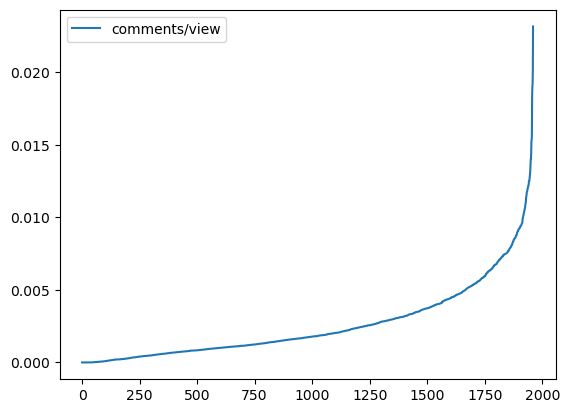

In [15]:
videos_df['comments/view'] = videos_df['commentCount'] / videos_df['viewCount']
videos_df.sort_values(by='comments/view').reset_index().plot(kind='line', y='comments/view')

In [16]:
# what are those comment/view outliers?
videos_df.sort_values(ascending=False, by='comments/view').head(n=2)

,channelTitle,title,publishedAt,categoryId,description,viewCount,likeCount,commentCount,duration,likes/view,comments/view
1581,NowThis News,Animal Rights Activist Regan Russell Killed at...,2020-12-11 21:59:53+00:00,25,Activist Regan Russell was killed while trying...,1592729.0,27877.0,36901.0,PT15M58S,0.017503,0.023168
1306,euronews,Russian police break up Gay Pride protest in S...,2018-08-04 17:16:49+00:00,25,Russian police detained as many as 30 gay righ...,3054570.0,122807.0,61435.0,PT1M3S,0.040204,0.020112
